# Complex-valued inversion of FDIP data

We exemplify complex-valued inversion of frequency-domain (FD) induced-polarization (IP) data by using a data set presented by Martin et al. (2020) over a Pyrite-bearing alumn shale. Here, we only use a low frequency (1 Hz) data set from the profile IP1 (see data in Figs. 4 and 5), comparing with the corresponding inversion result in Fig. 10.

The full data are available on https://zenodo.org/records/4419736


In [1]:
import pygimli as pg
from pygimli.physics import ert

In [2]:
data = pg.getExampleData("IP/schleizFDIP.dat")
print(data)

29/09/24 - 12:58:31 - pyGIMLi - INFO - Looking for IP/schleizFDIP.dat in gimli-org/example-data/


Data: Sensors: 42 data: 522, nonzero entries: ['a', 'b', 'ip', 'k', 'm', 'n', 'rhoa', 'valid']


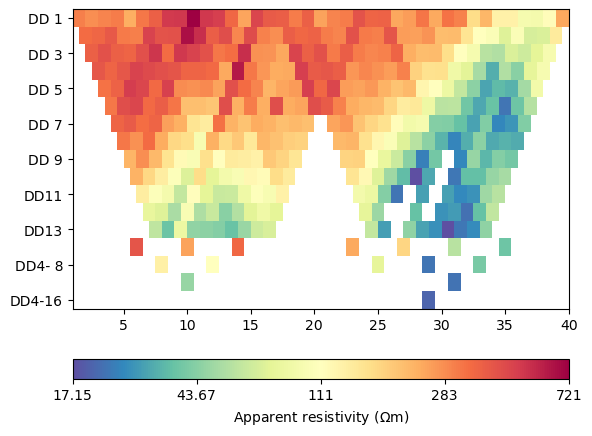

In [3]:
data.remove(data["rhoa"] < 15)
data.remove(data["k"] < -10000)
data.show();

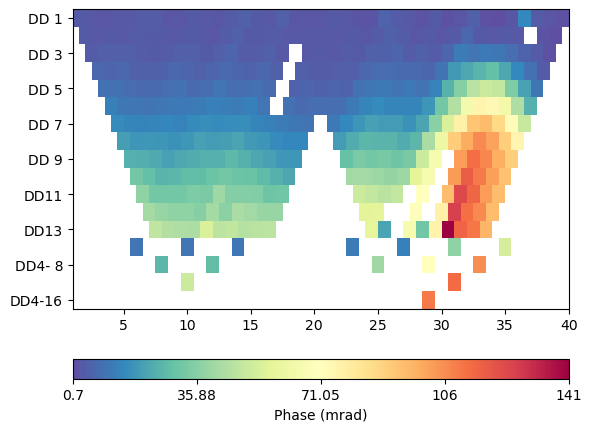

In [4]:
data.remove(data["ip"] <= 0)
data.show("ip", logScale=False);

29/09/24 - 12:58:32 - pyGIMLi - INFO - Found 2 regions.
29/09/24 - 12:58:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/24 - 12:58:32 - pyGIMLi - INFO - Found 2 regions.
29/09/24 - 12:58:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/24 - 12:58:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/09/24 - 12:58:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/09/24 - 12:58:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2059 Cells: 3872 Boundaries: 3026
29/09/24 - 12:58:32 - pyGIMLi - INFO - Use median(data values)=191.8285
29/09/24 - 12:58:32 - pyGIMLi - INFO - Created startmodel from forward operator:724, min/max=191.828500/191.828500
29/09/24 - 12:58:32 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001ACADE8EDB0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 17.15/721
min/max (error): 3%/3%
min/max (start model): 192/192
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1024.00
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   30.96 (dPhi = 96.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   11.65 (dPhi = 60.85%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.93 (dPhi = 58.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.86 (dPhi = 3.05%) lam: 20.0
--

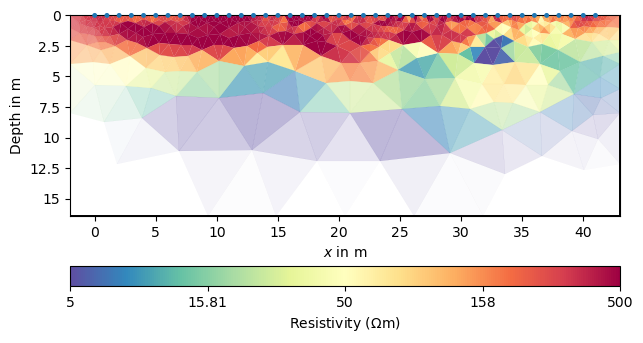

In [5]:
data.estimateError()
mgr = ert.ERTIPManager(data, fd=True)
mgr.invertDC(zWeight=0.2, verbose=True)
mgr.showResult(cMin=5, cMax=500);

In [6]:
mgr.invertFDIP(iperr=3)

29/09/24 - 12:58:36 - pyGIMLi - INFO - Found 2 regions.
29/09/24 - 12:58:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/24 - 12:58:36 - pyGIMLi - INFO - Found 2 regions.
29/09/24 - 12:58:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/09/24 - 12:58:36 - pyGIMLi - INFO - Starting inversion.
29/09/24 - 12:58:36 - pyGIMLi - INFO - Setting starting model as reference!
29/09/24 - 12:58:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/09/24 - 12:58:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/09/24 - 12:58:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2059 Cells: 3872 Boundaries: 3026


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001ACB5978680>
Data transformation: Logarithmic transform
Model transformation: Logarithmic transform
min/max (data): 0.09/721
min/max (error): 2.12%/375%
min/max (start model): 0.25/1016
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  252.41
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.14 (dPhi = 98.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.69 (dPhi = 12.50%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.66 (dPhi = 0.36%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.36 (< 2.0%)                 #
##############################################################

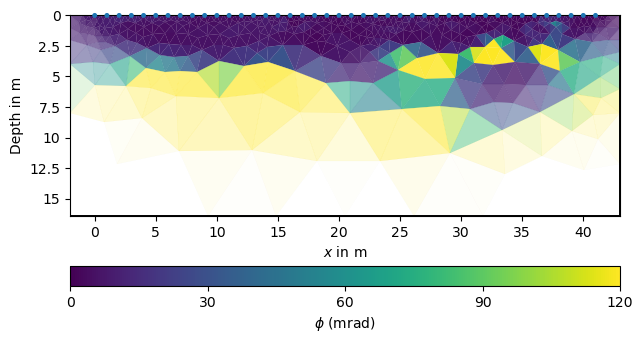

In [7]:
mgr.showIPModel(cMin=0, cMax=120);

### References

Martin, T., Günther, T., Orozco, A.F. & Dahlin, T. (2020): Evaluation of spectral induced polarization field measurements in time and frequency domain, J. Appl. Geophys. 180, 104141, doi:10.1016/j.jappgeo.2020.104141.